https://jretamales.github.io/2019-01-29-embeddings_101/

In [ ]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader



In [ ]:
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=80e6ca1a0bd69cee2f2d1983d5bff6938c0f2cf5f28e78df65a7e1ebfe6e95f8
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [ ]:
from adjustText import adjust_text

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/adult.csv', sep=",", index_col=None)

In [ ]:
df.replace(to_replace='?', value= np.nan, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
df.income = df.income.replace({'<=50K': 0, '>50K': 1})

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [ ]:
df = df.drop('fnlwgt', axis = 1)
df = df.drop('capital-loss', axis = 1)
df = df.drop('educational-num', axis = 1)

In [ ]:
df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,40,United-States,1
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,30,United-States,0
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,32,United-States,1
8,24,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,0,40,United-States,0
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,10,United-States,0
10,65,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,40,United-States,1
11,36,Federal-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,40,United-States,0


In [ ]:
categ_cols = ['workclass', 'education','marital-status','occupation', 'relationship', 'race',  'gender','native-country'] 
contin_cols = ['age', 'capital-gain', 'hours-per-week']

In [ ]:
N_CONT = len(contin_cols)
N_CONT

3

In [ ]:
def encode_column(df, col):
    """
    Función que mapea cada categoría en la columna col de un dataframe a una
    etiqueta númerica. Transformando en su sitio la columna y devolviendo
    una tupla que contiene las etiquetas originales y transformadas.
    Input:
    df = Pandas DataFrame
    col = Nombre de columna
    Output: Tupla de etiquetas originales y transformadas.
    """

    e = preprocessing.LabelEncoder() # instanciamos un modelo de sklearn para
    # etiquetar numericamente cada categoría.
    e = e.fit(df[col]) # Ajustamos a la data
    df[col] =e.transform(df[col]) # Recodificamos la columna del df con 
    # etiquetas númericas
    return e.classes_, e.transform(e.classes_)# tupla de categ originales y 
    # nuevas etiquetas

In [ ]:
categ_cols_mapping = {col: encode_column(df, col) for col in categ_cols}

In [ ]:
scaler = preprocessing.StandardScaler()
df[contin_cols] = scaler.fit_transform(df[contin_cols])

In [ ]:
"""
Esto lo realizaremos mediante el metodo concat de pandas. En breve, concat 
concatena dataframes según el eje que definamos. Pyede ser 0, si queremos 
concatenar agregando filas, y 1, si queremos concatenar agregando columnas.

Los dataframes a concatenar se entregarn a la función mediante una lista.
En este caso son 3 dataframes. El primer dataframe contiene 
las variables continuas y categóricas (etiquetadas númericamente).
El segundo dataframe, una transformación de las variables categóricas al método
one-hot encoding. Y el tercer df con nuestra variable dependiente: 'income'
""" 

df = pd.concat([df[categ_cols + contin_cols], 
           pd.get_dummies(data = df[categ_cols], 
                          columns = categ_cols, 
                          drop_first = True, 
                          prefix_sep = '_onehot_'),
          df['income']], axis = 1)

In [ ]:
df = pd.concat([df[categ_cols + contin_cols], 
                   df['income']], axis = 1)

In [ ]:
df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,capital-gain,hours-per-week,income
0,2,1,4,6,3,2,1,38,-1.024983,-0.146733,-0.078120,0
1,2,11,2,4,0,4,1,38,-0.041455,-0.146733,0.754701,0
2,1,7,2,10,0,4,1,38,-0.798015,-0.146733,-0.078120,1
3,2,15,2,6,0,2,1,38,0.412481,0.877467,-0.078120,1
5,2,0,4,7,1,4,1,38,-0.344079,-0.146733,-0.910942,0


In [ ]:
# Nuestro df tiene como última columna la variable dependiente. Por ello el -1.
# Además notar el uso de una semilla seudo-aleatoria, con el propósito 
# de replicabilidad en resultados.
train_x, test_x, train_y, test_y = model_selection.train_test_split(df[df.columns[:-1]], 
                                                                    df[df.columns[-1]] , 
                                                                    test_size = 0.2,
                                                                    random_state = 43)

In [ ]:
inputs = torch.from_numpy(train_x.values)
labels = torch.from_numpy(train_y.values.reshape(-1,1)).float()

inputs_test = torch.from_numpy(test_x.values)
labels_test = torch.from_numpy(test_y.values.reshape(-1,1)).float()

In [ ]:
class myDataset(Dataset):
    """
    Para crear un objeto del tipo DataLoader, debemos convertir nuestros tensores
    a un objeto pytorch Dataset. Esto se logra creando una clase que hereda de
    pytorch dataset, donde se debe especificar 3 funciones: __init__ 
    (donde creamos los atributos de etiquetas (labels) y variables 
    independientes (X)), __len__  (donde devolvemos el tamaño de nuestro dataset)
    y __getitem__ (para indexar nuestro dataset, o, en otras palabras,
    obtener a demanda la observación i del dataset)
    """
  
  
    def __init__(self, x, labels):
        self.labels = labels
        self.X = x

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        X = self.X[index,:]
        y = self.labels[index]
        return X, y

In [ ]:
torch.manual_seed(43)
torch.cuda.manual_seed(43)
np.random.seed(43)
torch.backends.cudnn.deterministic=True

In [ ]:
trainloader = DataLoader(myDataset(inputs, labels), # tensores convertidos
                         batch_size=500, # tamaño de cada batch
                         shuffle=True, # orden aleatorio por cada epóca
                         num_workers=2) # cuanto procesamiento en paralelo deseamos

testloader = DataLoader(myDataset(inputs_test, labels_test), 
                        batch_size=500,
                        shuffle=True, 
                        num_workers=2)

In [ ]:
def get_embed_dims(df, categ_cols):
    return [(len(df[col].unique()), int(len(df[col].unique())/2)) for col in categ_cols]

embed_dims = get_embed_dims(df, categ_cols)

In [ ]:
class EmbeddingModel(nn.Module):

    def __init__(self, n_cont, embed_dims, inter_dense, inter_dense_2, dropout = 0.1):
        """
        Función que permite crear una instancia de objeto Embedding Model
        Input:
        n_cont (int): Número de variables contínuas.
        embeds_dims (lista): Lista donde se epecifica (por categoría) el num de 
        categorías y de dimensiones de cada embedding.
        inter_dense (int): Tamaño del output de la primer capa de 
        transformación lineal.
        inter_dense2 (int): Tamaño del output de la segunda capa de 
        transformación lineal.
        dropout (float): Probabilidad que un elemento de input a esta capa sea 
        asignada con un 0. (Se utiliza como herramienta para prevenir el 
        sobreajuste del modelo).
        """
        # Llamamos al método __init__ del objeto padre de EmbeddingModel, es decir,
        # nn.Module
        super(EmbeddingModel, self).__init__()
        #almacenamos en la instancia la cantidad de variables contínuas.
        self.n_cont = n_cont
        self.embeds_list = nn.ModuleList([nn.Embedding(num_embeddings = vocab_size, 
                                     embedding_dim = e_dim) for vocab_size, e_dim in embed_dims])
        emb_sz = sum([e_dim for vocab_size, e_dim in embed_dims])
        self.linear1 = nn.Linear(emb_sz +n_cont, inter_dense)
        self.linear2 = nn.Linear(inter_dense, inter_dense_2)
        self.linear3 = nn.Linear(inter_dense_2, 1)
        self.dropout = nn.Dropout(dropout)

    def forward(self, inputs):
        """
        Para ilustrar como se relacionan las capas se incluye siguiente figura.
        Que muestra la capas desde el consumo de inputs (parte superior) hasta el
        output (parte inferior).
        """
        embeds = [emb(inputs[:, i].long()) for i, emb in enumerate(self.embeds_list)] 
        embeds = torch.cat(embeds, 1)
        embeds_cont = torch.cat(( embeds, inputs[:,-self.n_cont:].float() ), 1)
        embeds_cont = torch.relu(self.linear1(embeds_cont))
        out = self.dropout(embeds_cont)
        out = torch.relu(self.linear2(out))
        out = self.linear3(out)
        probs = torch.sigmoid(out)
        return probs

In [ ]:
embed_dims

[(7, 3), (16, 8), (7, 3), (14, 7), (6, 3), (5, 2), (2, 1), (41, 20)]

In [ ]:
model = EmbeddingModel(n_cont = N_CONT, embed_dims= embed_dims,
                       inter_dense = 80, inter_dense_2 = 40, 
                       dropout = 0.17)
optimizer = optim.Adam(model.parameters())
loss_function = nn.BCELoss()

In [ ]:
losses = [] # lista que almacena resultado de la función de perdida por época.
accs = [] # lista que almacenará los accuracies por época
data_size = len(trainloader.dataset) # tamaño del dataset de entrenamiento.

for epoch in range(100): #1 epoca = recorrer totalmente el dataset de 
    #entrenamiento
    correct = 0 # inicializamos el conteo de correctas y la perdida
    running_loss = 0.0
  
    for i, data in enumerate(trainloader, 0): # cada iteración es un batch 
        #de data
        inputs, labels = data # dividimos la data en vars indpts (inputs) y 
        # depdts (labels)
        optimizer.zero_grad() # setea todas las gradientes en 0 en backprop.

        outputs = model(inputs) # Generamos el output del modelo
        loss = loss_function(outputs, labels) # la perdida del modelo
        # versus las etiquetas reales.

        loss.backward() # calculamos las gradientes
        optimizer.step() # actualizamos los parametros del modelo

        # Métricas
        running_loss += loss.item() # recolectamos la pérdida de iter actual

        predicted = (outputs>0.5).float() # Las estimaciones del modelo según 
        # la codificación especificada anteriormente de income.
        truth = (labels>0.5).float() # las etiquetas reales
        correct += (predicted == truth).float().sum() # Cantidad de preds
        # correctas

  
    accs.append(correct/data_size)  # Accuracy de cada epoca
    losses.append(running_loss/data_size) # Perdida total de la época
print('Fin Entrenamiento')

Fin Entrenamiento


In [ ]:
accs[-5:]

[tensor(0.8661),
 tensor(0.8666),
 tensor(0.8666),
 tensor(0.8674),
 tensor(0.8659)]

In [ ]:
data_size = len(testloader.dataset)

model.eval() #cambiamos a modo de evaluación
with torch.no_grad(): # comunicamos a pytorch que queremos desactivar el cálculo
  # automatico de gradientes. Lo que reduce memoria y agiliza el análisis.
  # El resto del script es parecido al código referente a entrenamiento
  # con la excepción que solo es 1 pasada por los datos.
    correct = 0 
    total_loss = 0
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        total_loss += loss.item()/len(data)
        predicted = (outputs>0.5).float()
        truth = (labels>0.5).float()
        correct += (predicted == truth).float().sum()
  
    accuracy = correct/data_size
    total_loss = total_loss/data_size
print(f'Total Loss: {total_loss}')
print(f'Accuracy: {accuracy}')

Total Loss: 0.00034723376588573636
Accuracy: 0.8488667607307434


In [ ]:
w = list(model.parameters())
embed_dict = {col: (categ_cols_mapping[col][0], w[i].detach().numpy()) for i, col in enumerate(categ_cols)}

In [ ]:
def plot_embed(embed_dict, col, perplexity = 2, n = 2 ):
    """
    Función que genera una visualización en menor dimensionalidad de un embedding
    Input:
    embed_dict (diccionario): Diccionario de embeddings
    col (string): Nombre de variable categórica
    perplexity (float): Parámetro utilizado por el TSNE para calcular la 
    representación.
    n (int): Dimensionalidad de la representación resultante de TSNE.
    """
    # Primero instanciamos TSNE
    tsne = TSNE(n_components = n, init='pca', random_state=43, 
          method='exact', perplexity=perplexity)
    # Ajustamos a nuestro embedding original obteniendo la representacion TSNE.
    X_embed = tsne.fit_transform(embed_dict[col][1])

    # Creamos un objeto para visualizar la representación TSNE.
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
    # Graficamos la representación (data)
    ax.scatter(X_embed[:,0], X_embed[:,1])
    ax.set_title('TSNE - ' + col) # titulo

    # Etiquetamos cada punto para mayor claridad
    texts = [ax.text(X_embed[i,0], X_embed[i,1], txt) for i, 
       txt in enumerate(embed_dict[col][0])]

    # Utilizamos la función adjust_text para mejor distinción de cada etiqueta
    adjust_text(texts)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def plot_embed2(embed_dict, col, perplexity = 2, n = 2 ):
    """
    Función que genera una visualización en menor dimensionalidad de un embedding
    Input:
    embed_dict (diccionario): Diccionario de embeddings
    col (string): Nombre de variable categórica
    perplexity (float): Parámetro utilizado por el TSNE para calcular la 
    representación.
    n (int): Dimensionalidad de la representación resultante de TSNE.
    """
    # Primero instanciamos TSNE
    tsne = TSNE(n_components = n, init='pca', random_state=43, 
          method='exact', perplexity=perplexity)
    # Ajustamos a nuestro embedding original obteniendo la representacion TSNE.
    X_embed = tsne.fit_transform(embed_dict[col][1])

    X_embed = PCA(n_components=2).fit_transform(embed_dict[col][1])


    # Creamos un objeto para visualizar la representación TSNE.
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
    # Graficamos la representación (data)
    ax.scatter(X_embed[:,0], X_embed[:,1])
    ax.set_title('TSNE - ' + col) # titulo
    plt.grid()

    # Etiquetamos cada punto para mayor claridad
    texts = [ax.text(X_embed[i,0], X_embed[i,1], txt) for i, 
       txt in enumerate(embed_dict[col][0])]

    # Utilizamos la función adjust_text para mejor distinción de cada etiqueta
    adjust_text(texts)

In [ ]:
categ_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


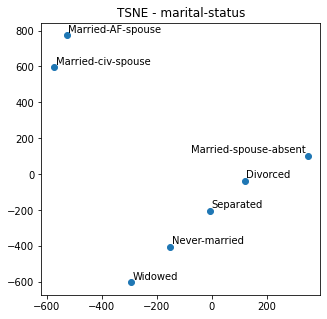

In [ ]:
plot_embed(embed_dict = embed_dict, col= 'marital-status',  perplexity = 2)